In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deps import cv_core
import cv2
import glob

In [2]:
camera_res = {
            '240':(320,240),
            '480':(640,480),
            '600':(800,600),
            '768':(1024, 768),
            '960':(1280, 960),
            '1200':(1600, 1200),
            '1536':(2048, 1536),
            '1944':(2592, 1944),
            '2448':(3264, 2448)}

In [5]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['768'])
cv_core.video_test(cap)
cap.release()

: 

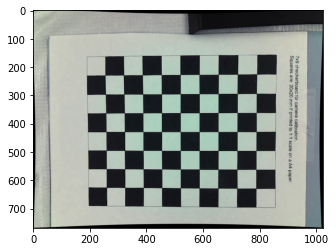

In [3]:
img = cv2.imread('calibresult.png')
features_mm_to_pixels_dict =  {(0, 0): (192, 801, ),
                                (214.2, 0): (937, 652),
                                (214.2, 178.5): (798, 67),
                                (0, 178.5): (101, 197)}

plt.imshow(img)

In [4]:
features_mm_to_pixels_dict =  {(0, 0): (197, 690),
                                (203, 162): (861, 157),
                                (203, 0): (856, 697),
                                (0, 162): (190, 164)}

A = np.zeros((2 * len(features_mm_to_pixels_dict), 6), dtype=float)
b = np.zeros((2 * len(features_mm_to_pixels_dict), 1), dtype=float)
index = 0
for XY, xy in features_mm_to_pixels_dict.items():
    X = XY[0]
    Y = XY[1]
    x = xy[0]
    y = xy[1]
    A[2 * index, 0] = x
    A[2 * index, 1] = y
    A[2 * index, 2] = 1
    A[2 * index + 1, 3] = x
    A[2 * index + 1, 4] = y
    A[2 * index + 1, 5] = 1
    b[2 * index, 0] = X
    b[2 * index + 1, 0] = Y
    index += 1
# A @ x = b
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

In [8]:
pixels_to_mm_transformation_mtx = np.array([[x[0, 0], x[1, 0], x[2, 0]], [x[3, 0], x[4, 0], x[5, 0]], [0, 0, 1]])
test_xy_1 = (723, 295, 1)
test_XY_1 = pixels_to_mm_transformation_mtx @ test_xy_1

In [9]:
test_XY_1

array([161.70155133, 121.10745199,   1.        ])

In [3]:
cap = cv2.VideoCapture(0)
cap = cv_core.set_res(cap, camera_res['768'])
#out = cv2.VideoWriter('out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))

while(True):
    ret, frame = cap.read()

    a,b,r,sorted_contours = cv_core.find_contours(frame)
    plot_img = frame.copy()
    cv2.circle(plot_img, (a, b), r, (0, 255, 0), 2)
    cv2.circle(plot_img, (a, b), 1, (255, 0, 0), 3)
    with_contours = cv2.drawContours(plot_img, sorted_contours, -1,(0,255, 0),2)
    #out.write(with_contours)

    cv2.imshow('frame',with_contours)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
#out.release()
cv2.destroyAllWindows()

In [2]:
images = sorted(glob.glob('data/image*.png'))


font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

for idx, image in enumerate(images):
    img = cv2.imread(image)
    img = cv2.putText(img, f'{idx}', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
    cv2.imwrite(f'marked/image{idx}.png', img)